<a href="https://colab.research.google.com/github/niteshavagabond/Hotel-Booking-analysis/blob/main/Hotel_Booking_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

## <b>This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. </b>

## <b> Explore and analyze the data to discover important factors that govern the bookings. </b>

In [97]:
# importing libararies
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime 
from datetime import date
import folium
import plotly.express as px
%matplotlib inline

In [98]:
# mount google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [99]:
# Data 
hotel_booking_df= pd.read_csv('/content/drive/MyDrive/AlmaBetter/Hotel Booking Analysis - Nitesh Verma/Hotel Bookings.csv')


# Exploring data

In [100]:
hdf=hotel_booking_df.copy()

In [101]:
hdf.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [102]:
hdf.tail()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07
119389,City Hotel,0,205,2017,August,35,29,2,7,2,...,No Deposit,9.0,NaN,0,Transient,151.20,0,2,Check-Out,2017-09-07


In [103]:
hdf.shape

(119390, 32)

In [104]:
hdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [105]:
hdf.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [106]:
hdf.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

# Exploring every column of database, try to analyse and taking notes


In [107]:
hdf_columns_table=[[name,hdf[name].dtypes,hdf[name].isnull().sum(),round(hdf[name].isnull().sum()/len(hdf)*100, 2),
                   hdf[name].nunique(),hdf[name].unique()] for name in hdf.columns]
hdf_columns = pd.DataFrame(hdf_columns_table, columns = ['Column', 'Dtype', 'Null', 'Null (%)', 'nUnique', 'Unique'])
hdf_columns

,Column,Dtype,Null,Null (%),nUnique,Unique
0,hotel,object,0,0.00,2,"[Resort Hotel, City Hotel]"
1,is_canceled,int64,0,0.00,2,"[0, 1]"
2,lead_time,int64,0,0.00,479,"[342, 737, 7, 13, 14, 0, 9, 85, 75, 23, 35, 68..."
3,arrival_date_year,int64,0,0.00,3,"[2015, 2016, 2017]"
4,arrival_date_month,object,0,0.00,12,"[July, August, September, October, November, D..."
5,arrival_date_week_number,int64,0,0.00,53,"[27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 3..."
6,arrival_date_day_of_month,int64,0,0.00,31,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14..."
7,stays_in_weekend_nights,int64,0,0.00,17,"[0, 1, 2, 4, 3, 6, 13, 8, 5, 7, 12, 9, 16, 18,..."
8,stays_in_week_nights,int64,0,0.00,35,"[0, 1, 2, 3, 4, 5, 10, 11, 8, 6, 7, 15, 9, 12,..."
9,adults,int64,0,0.00,14,"[2, 1, 3, 4, 40, 26, 50, 27, 55, 0, 20, 6, 5, 10]"


# Data cleaning process
1. Deal with columns name and give a proper name to columns.
2. Deal with duplicate rows if any
3. Drop columns, which are not required or having same values
4. Deal with null data or missing value 
5. Deal with outliers in every columns
6. Change datatype of column if needed like children is an object dtype but should be an int type.
7. merge columns (e.g. [booking_day, booking_month, booking_year], [no_of_adults, no_of_children, no_of_babies] and [stays_in_weekend_nights,  stays_in_week_nights])   

# 1.Deal with columns name and give a proper name to columns.

In [108]:
# giving proper name to columns
hdf.columns=['hotel','booking_cancel_status','lead_time','arrival_date_year','arrival_date_month','arrival_date_week_number','arrival_date_day_of_month',
             'stays_in_weekend_nights','stays_in_week_nights','no_of_adults','no_of_children','no_of_babies','meal_type','country','market_segment',
             'distribution_channel','repeated_guest_status','no_of_previous_cancellations','no_of_previous_booking_not_cancelled',
             'reserved_room_type','assigned_room_type','no_of_booking_changes','deposit_type','agent_id','company_id',
             'no_of_days_in_waiting_list','customer_type','adr','required_no_of_car_parking_space',
             'total_no_of_special_requests','reservation_status','reservation_status_date']

In [109]:
hdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   hotel                                 119390 non-null  object 
 1   booking_cancel_status                 119390 non-null  int64  
 2   lead_time                             119390 non-null  int64  
 3   arrival_date_year                     119390 non-null  int64  
 4   arrival_date_month                    119390 non-null  object 
 5   arrival_date_week_number              119390 non-null  int64  
 6   arrival_date_day_of_month             119390 non-null  int64  
 7   stays_in_weekend_nights               119390 non-null  int64  
 8   stays_in_week_nights                  119390 non-null  int64  
 9   no_of_adults                          119390 non-null  int64  
 10  no_of_children                        119386 non-null  float64
 11  

#2. Deal with duplicate rows and columns



In [110]:
# we are going to find out, how many duplicate rows are their.
hdf[hdf.duplicated()].shape

(31994, 32)

In [111]:
# droping the duplicate rows
hdf.drop_duplicates(inplace = True)


#3. Drop columns, which are not required or having same values

In [112]:
# we are dropping market_segment, company_id and agent_id column
hdf.drop(['market_segment'],axis=1,inplace=True)
hdf.drop(['company_id'],axis=1,inplace=True)
hdf.drop(['agent_id'],axis=1,inplace=True)

In [113]:
# shape after cleaning the duplicate rows
hdf.shape

(87396, 29)

In [114]:
hdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87396 entries, 0 to 119389
Data columns (total 29 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   hotel                                 87396 non-null  object 
 1   booking_cancel_status                 87396 non-null  int64  
 2   lead_time                             87396 non-null  int64  
 3   arrival_date_year                     87396 non-null  int64  
 4   arrival_date_month                    87396 non-null  object 
 5   arrival_date_week_number              87396 non-null  int64  
 6   arrival_date_day_of_month             87396 non-null  int64  
 7   stays_in_weekend_nights               87396 non-null  int64  
 8   stays_in_week_nights                  87396 non-null  int64  
 9   no_of_adults                          87396 non-null  int64  
 10  no_of_children                        87392 non-null  float64
 11  no_of_babies  

#3. Deal with null data or missing value 

In [115]:
hdf['no_of_children']=hdf.no_of_children.fillna(hdf.no_of_children.mean())  # replacing null value in no_of_children column with mean of no_of_children column
hdf['country']=hdf.country.fillna('others')                                 # # replacing null values in company column with others

#4. Change datatype of column if needed 


In [116]:
# converting no_of_children, agent_id and company_id columns into int type.
hdf[['no_of_children']]=hdf[['no_of_children']].astype('int64')

In [117]:
# converting reservation_status_data into datetime type.
hdf['reservation_status_date']=hdf['reservation_status_date'].apply(lambda x: datetime.strptime(x,'%Y-%m-%d'))

#5. Deal with outliers in every columns

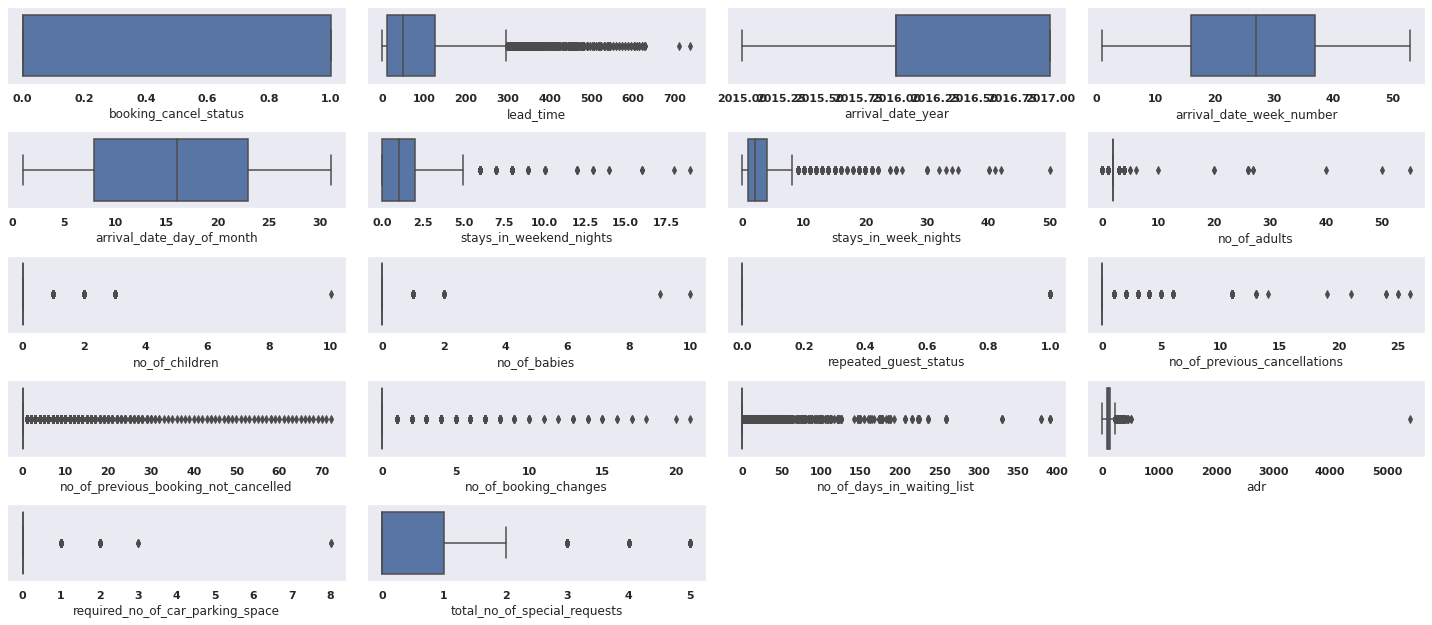

In [118]:
import warnings
warnings.simplefilter(action='ignore',category=FutureWarning)
plt.figure(figsize = (20, 10))
num_it = 1 

for col in hdf.describe().columns:
    plt.subplot(6,4,num_it)
    sns.boxplot(hdf[col])
    num_it+=1
    
plt.tight_layout()

adr has some outliers so we should look and deal with it.

In [119]:
hdf[hdf['adr']<0] #only 1 negative row in adr so we will drop it


,hotel,booking_cancel_status,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,no_of_adults,...,assigned_room_type,no_of_booking_changes,deposit_type,no_of_days_in_waiting_list,customer_type,adr,required_no_of_car_parking_space,total_no_of_special_requests,reservation_status,reservation_status_date
14969,Resort Hotel,0,195,2017,March,10,5,4,6,2,...,H,2,No Deposit,0,Transient-Party,-6.38,0,0,Check-Out,2017-03-15


In [120]:
hdf.drop(hdf.index[hdf['adr']<0],inplace=True) # dropping negative adr row

In [121]:
hdf[hdf['adr']>4000] # only 1 row where adr is greater than 4000 which is adr=5400 so we will drop this row

,hotel,booking_cancel_status,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,no_of_adults,...,assigned_room_type,no_of_booking_changes,deposit_type,no_of_days_in_waiting_list,customer_type,adr,required_no_of_car_parking_space,total_no_of_special_requests,reservation_status,reservation_status_date
48515,City Hotel,1,35,2016,March,13,25,0,1,2,...,A,1,Non Refund,0,Transient,5400.0,0,0,Canceled,2016-02-19


In [122]:
hdf.drop(hdf.index[hdf['adr']>4000],inplace=True) #dropping adr row which is higher than 4000

#5. merge columns (e.g. [booking_day, booking_month, booking_year], [no_of_adults, no_of_children, no_of_babies] and [stays_in_weekend_nights,  stays_in_week_nights])   

In [123]:
# first converting year, month and date into string then we will join them because we can't join data in int or float format
hdf['arrival_month_year']=hdf[['arrival_date_month','arrival_date_year']].astype('str').apply(lambda x: '-'.join(x),axis=1)

In [124]:
# now converting booking_date column from str to datetime type.
hdf['arrival_month_year']=hdf['arrival_month_year'].apply(lambda x : datetime.strptime(x,'%B-%Y'))

In [125]:
# finding out, how many people are there in a group and storing in total_no_of_group 
hdf['total_no_in_group']=hdf['no_of_adults'] + hdf['no_of_children'] +hdf['no_of_babies']

In [126]:
hdf['total_no_of_stays']=hdf['stays_in_week_nights'] + hdf['stays_in_weekend_nights']

In [127]:
hdf.iloc[:20,7:] #looking data for confirmation

,stays_in_weekend_nights,stays_in_week_nights,no_of_adults,no_of_children,no_of_babies,meal_type,country,distribution_channel,repeated_guest_status,no_of_previous_cancellations,...,no_of_days_in_waiting_list,customer_type,adr,required_no_of_car_parking_space,total_no_of_special_requests,reservation_status,reservation_status_date,arrival_month_year,total_no_in_group,total_no_of_stays
0,0,0,2,0,0,BB,PRT,Direct,0,0,...,0,Transient,0.00,0,0,Check-Out,2015-07-01,2015-07-01,2,0
1,0,0,2,0,0,BB,PRT,Direct,0,0,...,0,Transient,0.00,0,0,Check-Out,2015-07-01,2015-07-01,2,0
2,0,1,1,0,0,BB,GBR,Direct,0,0,...,0,Transient,75.00,0,0,Check-Out,2015-07-02,2015-07-01,1,1
3,0,1,1,0,0,BB,GBR,Corporate,0,0,...,0,Transient,75.00,0,0,Check-Out,2015-07-02,2015-07-01,1,1
4,0,2,2,0,0,BB,GBR,TA/TO,0,0,...,0,Transient,98.00,0,1,Check-Out,2015-07-03,2015-07-01,2,2
6,0,2,2,0,0,BB,PRT,Direct,0,0,...,0,Transient,107.00,0,0,Check-Out,2015-07-03,2015-07-01,2,2
7,0,2,2,0,0,FB,PRT,Direct,0,0,...,0,Transient,103.00,0,1,Check-Out,2015-07-03,2015-07-01,2,2
8,0,3,2,0,0,BB,PRT,TA/TO,0,0,...,0,Transient,82.00,0,1,Canceled,2015-05-06,2015-07-01,2,3
9,0,3,2,0,0,HB,PRT,TA/TO,0,0,...,0,Transient,105.50,0,0,Canceled,2015-04-22,2015-07-01,2,3
10,0,4,2,0,0,BB,PRT,TA/TO,0,0,...,0,Transient,123.00,0,0,Canceled,2015-06-23,2015-07-01,2,4


#Exploratary Data Analysis
lets find the correlation between column then we will perform eda

In [128]:
hdf1=hdf.corr()

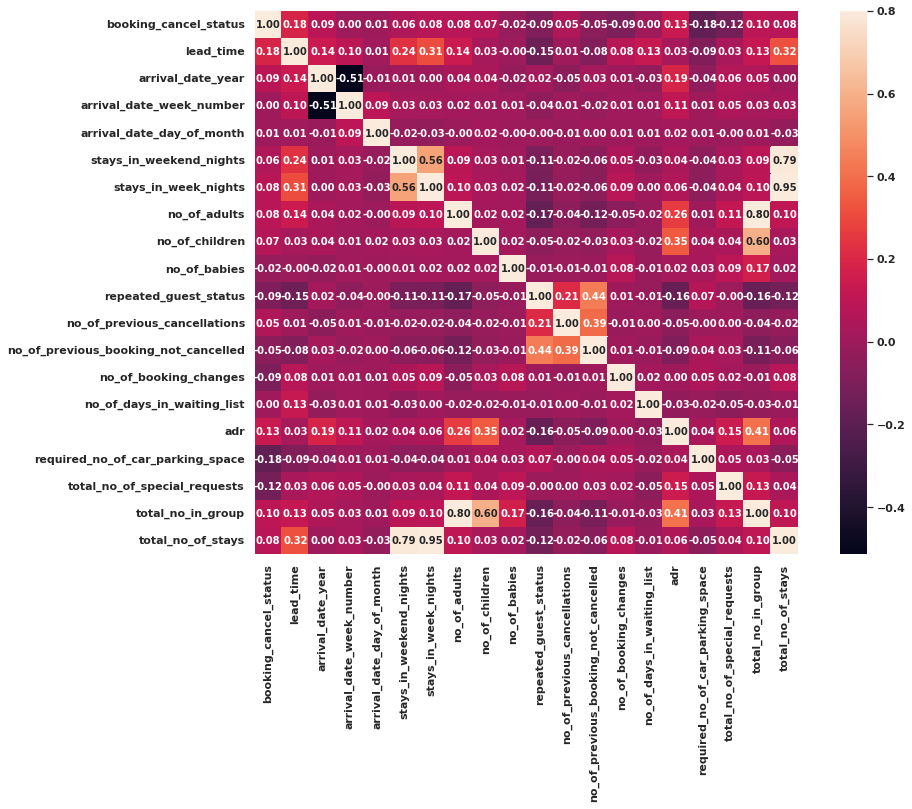

In [129]:
# ploting heat map finding correlation between columns
plt.subplots(figsize=(15, 10))
sns.heatmap(hdf1,annot = True,fmt='.2f', annot_kws={'size': 10},  vmax=.8, square=True);

# filtering the columns which are require in data analysis

In [130]:
df=hdf.copy()

In [131]:
df.head(3)

,hotel,booking_cancel_status,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,no_of_adults,...,no_of_days_in_waiting_list,customer_type,adr,required_no_of_car_parking_space,total_no_of_special_requests,reservation_status,reservation_status_date,arrival_month_year,total_no_in_group,total_no_of_stays
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,0,Transient,0.0,0,0,Check-Out,2015-07-01,2015-07-01,2,0
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,0,Transient,0.0,0,0,Check-Out,2015-07-01,2015-07-01,2,0
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,0,Transient,75.0,0,0,Check-Out,2015-07-02,2015-07-01,1,1


#Analysis on the Basis of columns
1. Analysis on the basis of hotel
2. Analysis on the basis of booking and cancellation
3. Analysis on the basis of adr(average daily rate)
4. Analysis on the basis of distribution channel
5. Analysis on the basis of deposit type
6. Analysis on the basis of meal type
7. Analysis on the basis of customer type
8. Analysis on the basis of room type
9. Analysis on the basis of country


#1. Analysis on the basis of Hotel

1.   Which hotel type is preferred the most?
2.   which hotel has a higher booking cancellation?
3.   How long do people prefer to stay in both hotels?
4.   Which hotel require more car parking spaces?
5.   Which hotel generates the most revenue?
6.   Which are the busiest months for hotel?
7.   Which hotel has the highest lead time?
8.   Was a hotel likely to receive a disproportionately high number of special requests?



Q1. Which hotel type prefered the most?

In [132]:
# Unique values in the hotel column
df['hotel'].unique()

array(['Resort Hotel', 'City Hotel'], dtype=object)

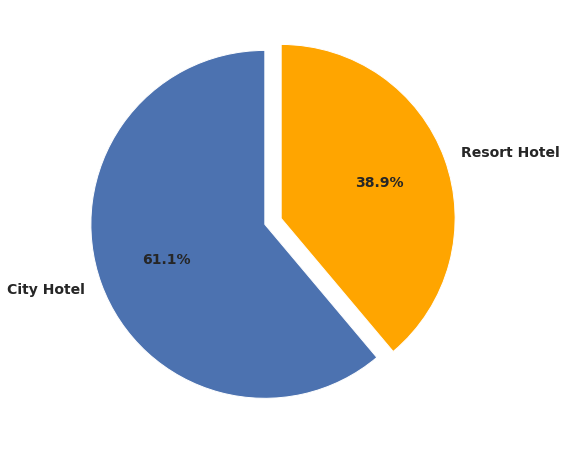

In [133]:
# Enlarging the pie chart
plt.rcParams['figure.figsize'] = 8,8

# Indexing labels. tolist() will convert the index to list for easy manipulation
labels = df['hotel'].value_counts().index.tolist()

# Convert value counts to list
sizes = df['hotel'].value_counts().tolist()

# As the name suggest, explode will determine how much each section is separated from each other 
explode = (0, 0.1)

# Determine colour of pie chart
colors = ['#4c72b0', 'orange']

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',startangle=90, textprops={'fontsize': 14})
plt.show()

Ans1. Around **61%** people booked **City Hotel** and **39%** people booked **Resort Hotel**. on the basis of percentage we can assume that **city hotel is more popular than Resort Hotel.**

Q2. Which hotel has a higher booking cancellation?

Text(0.5, 1.0, 'Count plot of hotels')

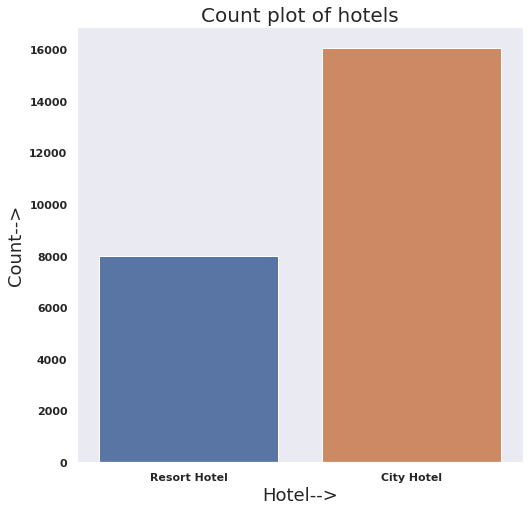

In [134]:
# Count plot of hotels
h_cancel=df[df['booking_cancel_status']==1]
sns.countplot(h_cancel['hotel'])
plt.xlabel('Hotel-->',fontsize=18)
plt.ylabel('Count-->',fontsize=18)
plt.title('Count plot of hotels',fontsize=20)

Ans2. City Hotel booking cancellation is higher than Resort hotel.

Q3. How long do people prefer to stay in both hotels?

Text(0.5, 1.0, 'Count plot of no of days to stay')

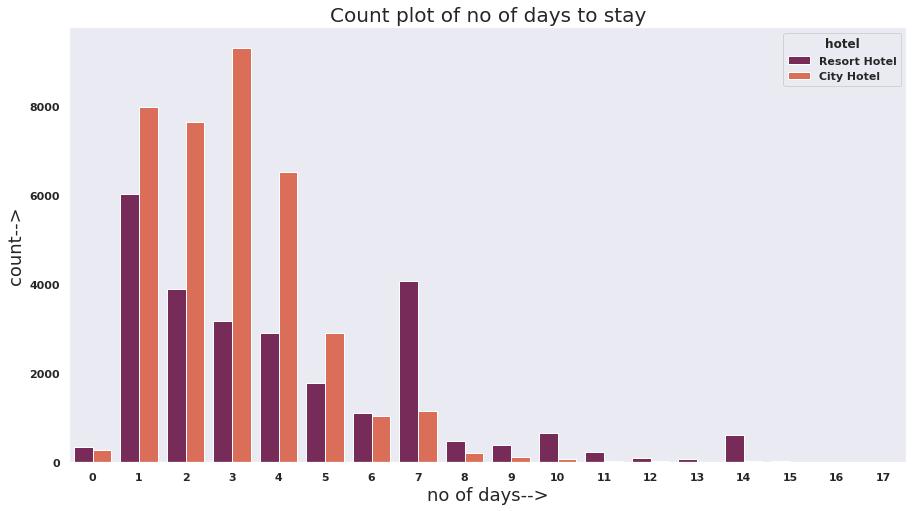

In [135]:
# Count plot of total no of stays
not_cancel=df[df['booking_cancel_status']==0]
not_cancel=not_cancel[not_cancel['total_no_of_stays'] < 18]
plt.figure(figsize = (15,8))
sns.countplot(x=not_cancel['total_no_of_stays'],hue=not_cancel['hotel'],palette='rocket')
plt.xlabel('no of days-->',fontsize=18)
plt.ylabel('count-->',fontsize=18)
plt.title('Count plot of no of days to stay',fontsize=20)

Ans3. On the basis of above chart, people prefer to stay in City Hotels for shorter duration like for 3-4 days and they prefer Resort Hotel for loger durationns like for 7-14 days.

Q4. Which hotel require more car parking spaces?

Text(0.5, 1.0, 'Required no of car parking spaces year wise trend')

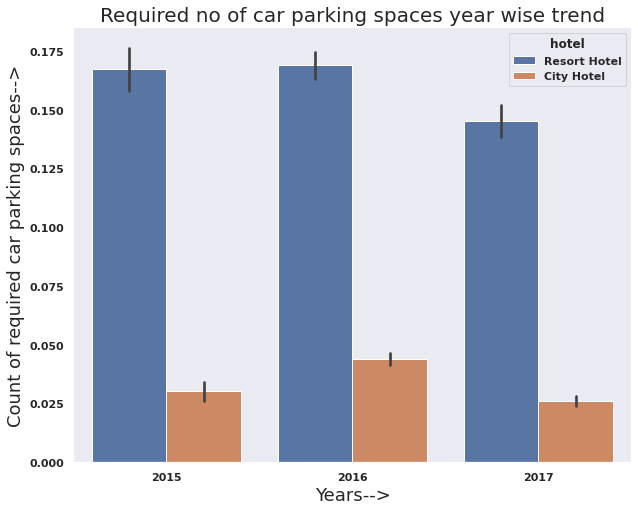

In [136]:
# bar graph on required no of car parking spaces year wise trend
plt.figure(figsize=(10,8))
sns.barplot(x=df['arrival_date_year'],y=df['required_no_of_car_parking_space'],hue=df['hotel'])
plt.xlabel('Years-->',fontsize=18)
plt.ylabel('Count of required car parking spaces-->',fontsize=18)
plt.title('Required no of car parking spaces year wise trend',fontsize=20)

Ans4. According above chart, every year **Resort Hotels** require more car parking space than City Hotel.

Q5.   Which hotel generates the most revenue?

Text(0.5, 1.0, 'Graph between hotel and average daily rate')

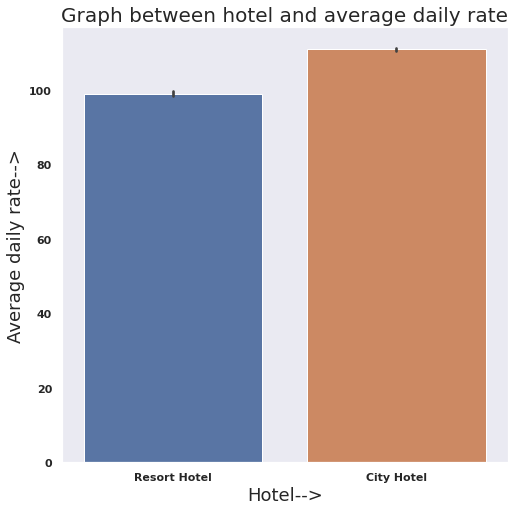

In [137]:
# Bar graph between hotel and average daily rate
sns.barplot(x=df['hotel'],y=df['adr'])
plt.xlabel('Hotel-->',fontsize=18)
plt.ylabel('Average daily rate-->',fontsize=18)
plt.title('Graph between hotel and average daily rate',fontsize=20)

Ans5. According to above bar charts, we can see that **City Hotel** generates the most revenue

Q6. Which are the busiest months for hotel?

Text(0.5, 1.0, 'Most busiest month chart')

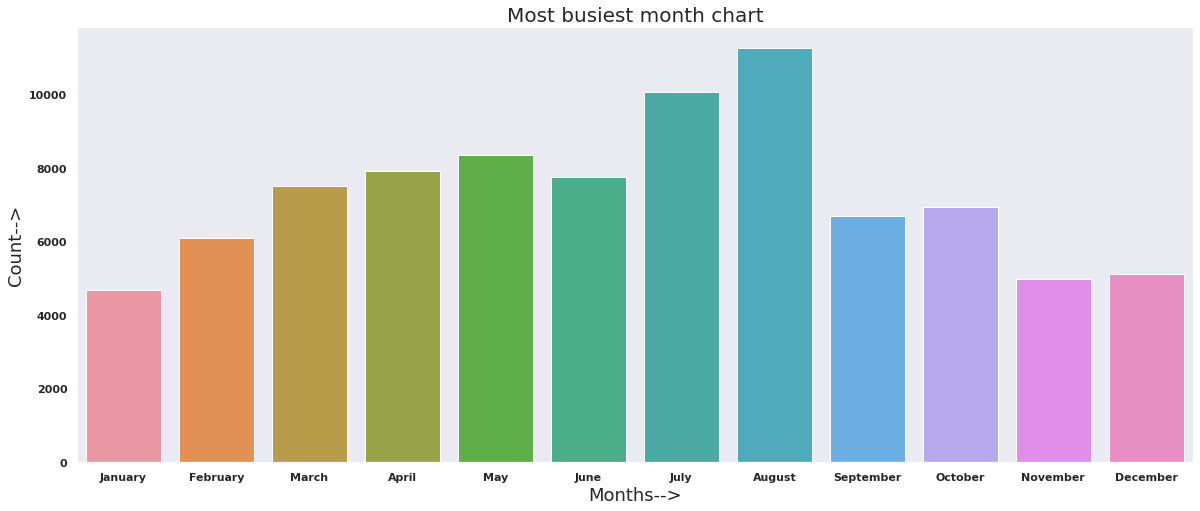

In [138]:

mpl.rc('font', weight='bold')
busiest_month=df['arrival_date_month'].value_counts().sort_values(ascending=False)
busy_month=pd.DataFrame(busiest_month).reset_index()
busy_month.columns=['month','count']
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
busy_month['month'] = pd.Categorical(busy_month['month'], categories = months, ordered=True)
busy_month.sort_values(by='month').reset_index(drop=True)
plt.figure(figsize=(20,8))
sns.barplot(x=busy_month['month'],y=busy_month['count'])
plt.xlabel('Months-->',fontsize=18)
plt.ylabel('Count-->',fontsize=18)
plt.title('Most busiest month chart',fontsize=20)


Ans6. According to chart, Most busiest months for hotels are  **July and August**

Q7. Which hotel has the higher lead time?

Text(0.5, 1.0, 'Average lead time for hotels')

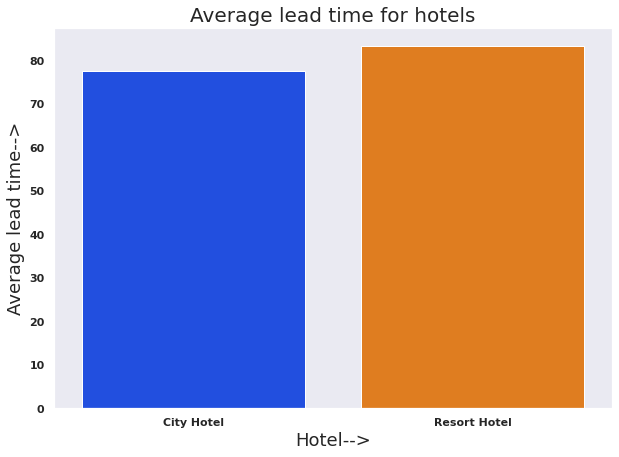

In [139]:
avg_lead=df.groupby(by='hotel').agg({'lead_time':'mean'}).reset_index()
avg_lead
plt.figure(figsize=(10,7))
sns.barplot(x=avg_lead['hotel'],y=avg_lead['lead_time'],palette='bright')
plt.xlabel('Hotel-->',fontsize=18)
plt.ylabel('Average lead time-->',fontsize=18)
plt.title('Average lead time for hotels',fontsize=20)

Ans7. According to above chart **Resort Hotel** has the highest average lead time.

Q8. Was a hotel likely top recieve a disproportionately high number of special requests?

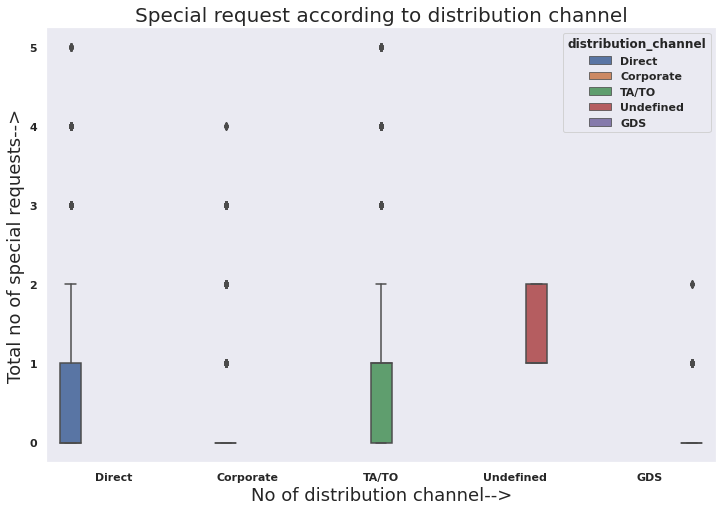

In [140]:
#Special request acoording to distribution channel
sns.boxplot(x="distribution_channel", y="total_no_of_special_requests",hue='distribution_channel',data= df)
plt.xlabel('No of distribution channel-->',fontsize=18)
plt.ylabel('Total no of special requests-->',fontsize=18)
plt.title("Special request according to distribution channel",fontsize=20)
fig = plt.gcf()
fig.set_size_inches(12,8)

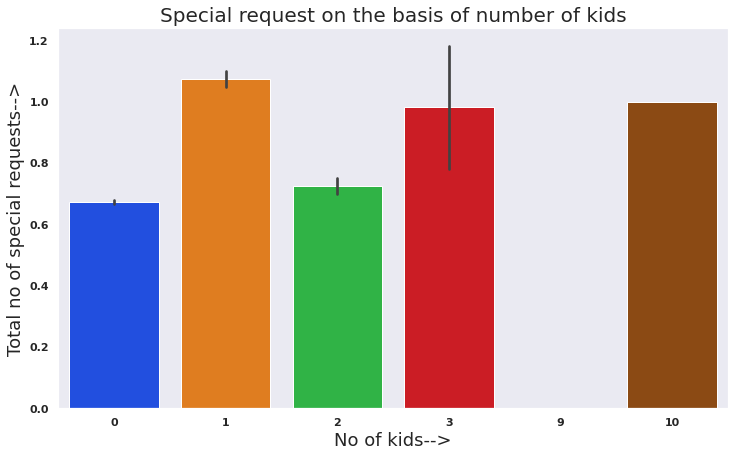

In [141]:
#Special requests on the basis of number of kids.
df['kids'] = df['no_of_children']+df['no_of_babies']
plt.figure(figsize=(12,7))
sns.barplot(x="kids", y="total_no_of_special_requests",data= df, palette='bright')
plt.xlabel('No of kids-->',fontsize=18)
plt.ylabel('Total no of special requests-->',fontsize=18)
plt.title("Special request on the basis of number of kids",fontsize=20)
fig = plt.gcf()


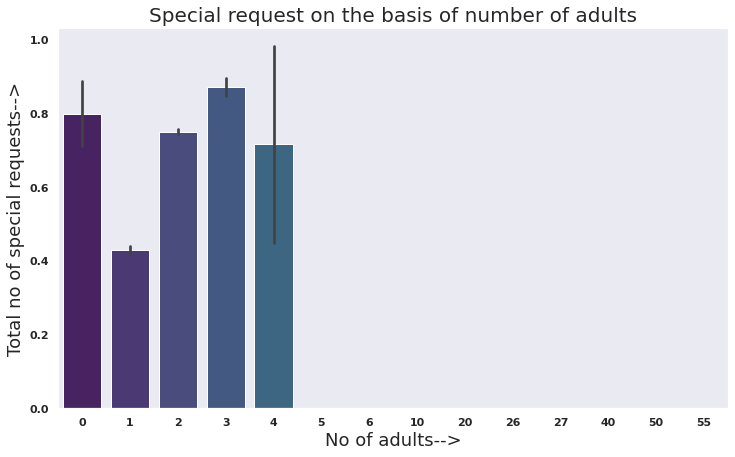

In [142]:
#Special request on the basis of number of adults.
sns.barplot(x="no_of_adults", y="total_no_of_special_requests",data= df, palette='viridis')
plt.xlabel('No of adults-->',fontsize=18)
plt.ylabel('Total no of special requests-->',fontsize=18)
plt.title("Special request on the basis of number of adults",fontsize=20)
fig = plt.gcf()
fig.set_size_inches(12,7)

#2.Analysis on the basis of bookings and cancellations


1.   Visualization of monthly bookings and monthly cancellations.
2.   Relationship between lead time and cancellation.
3.   Which type of customers book hotels the most?
4.   Which type of customers make the special requests?
5.   Which customer type  has the highest cancellation of bookings?
6.   When the best time of year to book a hotel room is?




Q1. Visualization monthly bookings and monthly cancellations

In [143]:
# taking different values of months count into account.
df_copy= df.copy()
df_copy['no_of_bookings']= 1
df_copy.loc[(df_copy.arrival_date_month== 'July')| (df_copy.arrival_date_month== 'August'),'no_of_bookings']/=3
df_copy.loc[~((df_copy.arrival_date_month== 'July')| (df_copy.arrival_date_month== 'August')),'no_of_bookings']/=2
df_copy.sample(100)

,hotel,booking_cancel_status,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,no_of_adults,...,adr,required_no_of_car_parking_space,total_no_of_special_requests,reservation_status,reservation_status_date,arrival_month_year,total_no_in_group,total_no_of_stays,kids,no_of_bookings
46195,City Hotel,1,12,2015,December,52,24,0,2,2,...,77.25,0,1,Canceled,2015-12-12,2015-12-01,2,2,0,0.500000
113254,City Hotel,0,140,2017,June,22,3,1,1,3,...,190.80,0,0,Check-Out,2017-06-05,2017-06-01,3,2,0,0.500000
88908,City Hotel,0,85,2016,May,20,13,0,1,2,...,125.10,1,3,Check-Out,2016-05-14,2016-05-01,2,1,0,0.500000
49277,City Hotel,1,20,2016,April,15,9,1,1,2,...,139.00,0,0,Canceled,2016-03-23,2016-04-01,2,2,0,0.500000
37650,Resort Hotel,0,152,2017,June,24,11,4,10,2,...,68.40,0,0,Check-Out,2017-06-25,2017-06-01,2,14,0,0.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111158,City Hotel,0,147,2017,May,18,4,0,3,2,...,126.00,0,2,Check-Out,2017-05-07,2017-05-01,2,3,0,0.500000
16632,Resort Hotel,0,36,2015,August,34,22,4,10,2,...,187.33,0,1,Check-Out,2015-09-05,2015-08-01,2,14,0,0.333333
50312,City Hotel,1,96,2016,April,18,28,0,3,2,...,180.30,0,0,Canceled,2016-01-23,2016-04-01,4,3,2,0.500000
97090,City Hotel,0,33,2016,September,37,10,1,1,2,...,144.90,0,1,Check-Out,2016-09-12,2016-09-01,2,2,0,0.500000


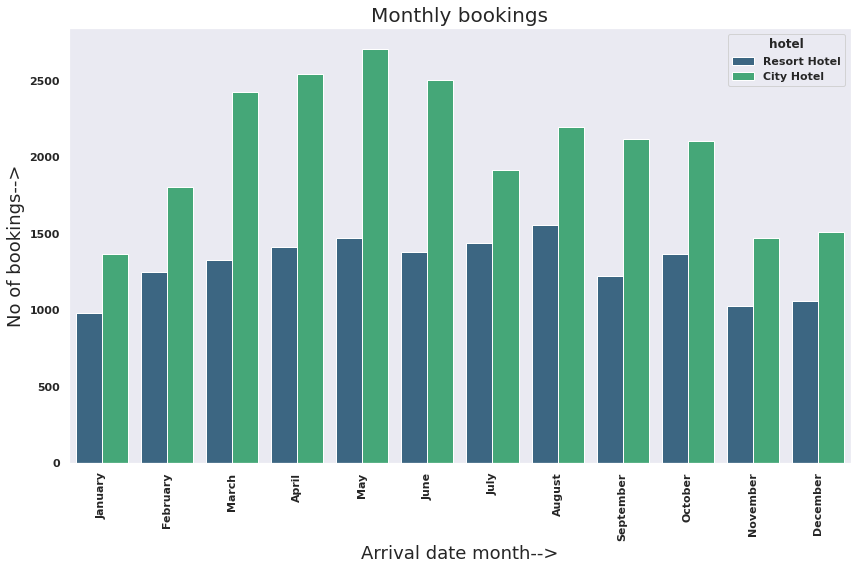

In [144]:
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
df_copy['arrival_date_month'] = pd.Categorical(df_copy['arrival_date_month'], categories = months, ordered=True)
plt.figure(figsize=(14,8))
sns.barplot(x= 'arrival_date_month', y= 'no_of_bookings', hue= df_copy['hotel'], estimator= sum, data= df_copy,palette='viridis')
plt.xlabel('Arrival date month-->',fontsize=18)
plt.ylabel('No of bookings-->',fontsize=18)
plt.title("Monthly bookings",fontsize=20)
plt.xticks(rotation = 90)
plt.show()

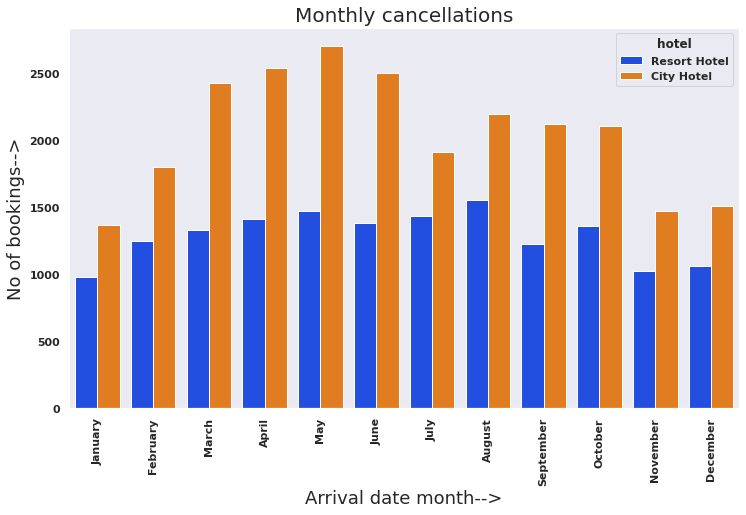

In [145]:
df_copy1= df.copy()
df_copy1['no_of_bookings']= 1
df_copy1.loc[(df_copy1.arrival_date_month== 'July')| (df_copy1.arrival_date_month== 'August'),'no_of_bookings']/=3
df_copy1.loc[~((df_copy1.arrival_date_month== 'July')| (df_copy1.arrival_date_month== 'August')),'no_of_bookings']/=2
df_copy1.sample(100)
b= df_copy1[df_copy1.booking_cancel_status == 1]
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
df_copy1['arrival_date_month'] = pd.Categorical(df_copy1['arrival_date_month'], categories = months, ordered=True)
sns.set(style="dark")
plt.figure(figsize=(12,7))
plt.title("Monthly cancellations",fontsize=20)
sns.barplot(x= 'arrival_date_month', y= 'no_of_bookings', hue= df_copy1['hotel'], estimator= sum, data= df_copy1,palette='bright')
plt.xlabel('Arrival date month-->',fontsize=18)
plt.ylabel('No of bookings-->',fontsize=18)
plt.xticks(rotation = 90)
plt.show()

Ans2. In City hotels bookings and cancellations are high during the months of  May , September and October, In case of resort hotels there is not much variations in bookings and cancellations. Bookings and cancellations are highest during the month of October.



Q2.Relationship between lead time and cancellations.

Text(0, 0.5, 'Lead time-->')

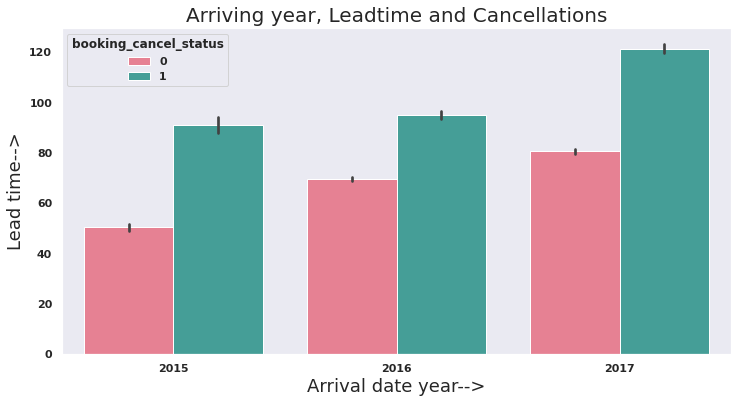

In [146]:
plt.figure(figsize=(12,6))
sns.barplot(x='arrival_date_year', y='lead_time',hue='booking_cancel_status', data= df, palette='husl')
plt.title('Arriving year, Leadtime and Cancellations',fontsize=20)
plt.xlabel('Arrival date year-->',fontsize=18)
plt.ylabel('Lead time-->',fontsize=18)

Text(0, 0.5, 'Lead time-->')

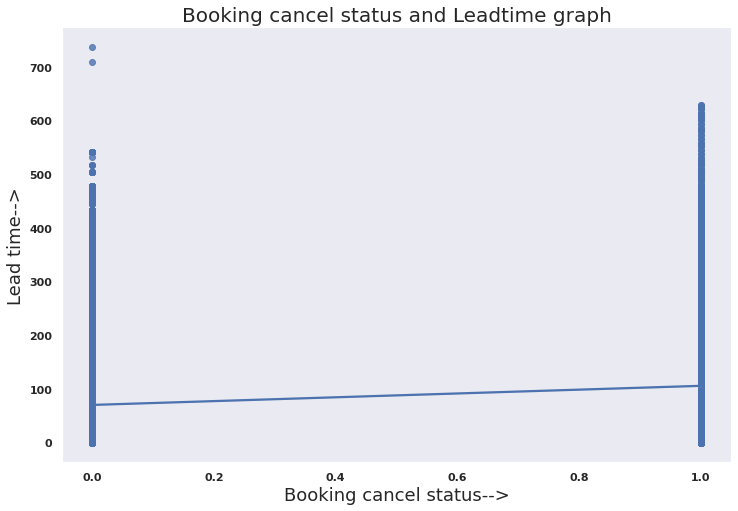

In [147]:
#correlation
plt.figure(figsize=(12,8))
sns.regplot(x=df['booking_cancel_status'],y=df['lead_time'])
plt.title('Booking cancel status and Leadtime graph',fontsize=20)
plt.xlabel('Booking cancel status-->',fontsize=18)
plt.ylabel('Lead time-->',fontsize=18)

Ans2. According to both charts, **Higher lead time leads to high booking cancellations** and **lower lead time leads to low booking cancellations**.

Q3.Which type of customers book hotels the most?



Text(0, 0.5, 'Count-->')

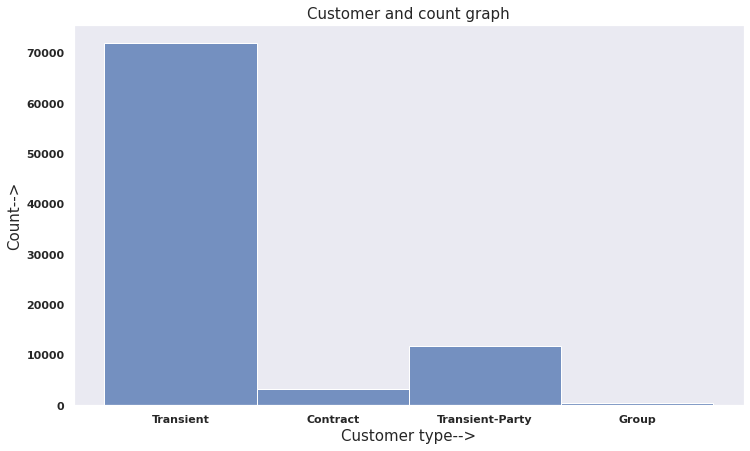

In [148]:
# histogram plot of customer's count
plt.figure(figsize=(12,7))
sns.histplot(df['customer_type'])
plt.title('Customer and count graph',fontsize=15)
plt.xlabel('Customer type-->',fontsize=15)
plt.ylabel('Count-->',fontsize=15)

Ans3. According to histogram chart Transient(when the booking is not part of a group or contract, and is not associated to other transient booking) customers make most bookings.

Q4. Which type of customers make the special requests?

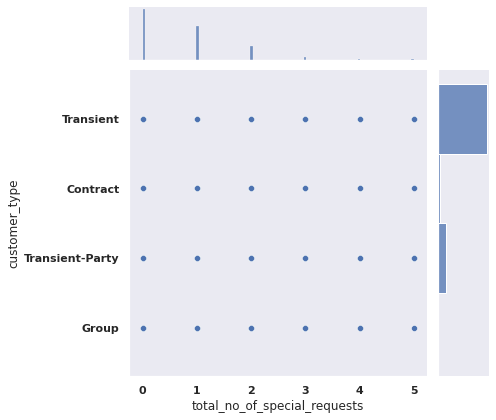

In [149]:
# joint plot between customer type and total no of special requests
sns.jointplot(x=df['total_no_of_special_requests'],y=df['customer_type'])

Ans4. According to joint chart, Most no of special requests comes from **Transient customers**.

Q5. Which customer type  has the highest cancellation of bookings?

Text(0.5, 1.0, 'Booking cancelled by groups on customer type')

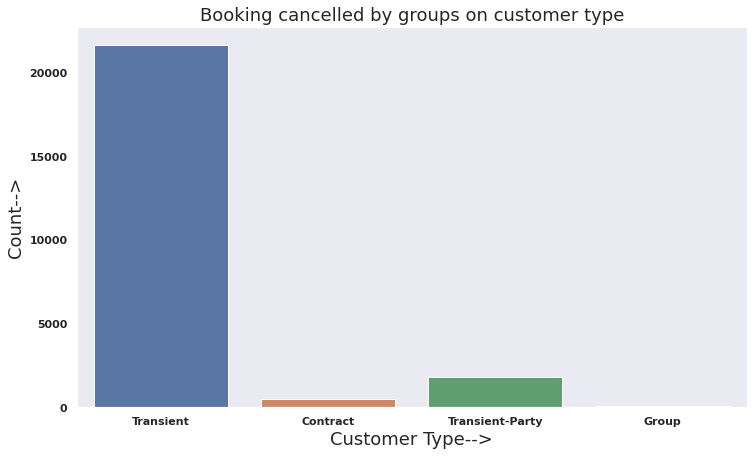

In [150]:
# Booking cancelled by groups on customer type
dist_cancel=df[df['booking_cancel_status']==1]
plt.figure(figsize=(12,7))
sns.countplot(dist_cancel['customer_type'])
plt.xlabel('Customer Type-->',fontsize=18)
plt.ylabel('Count-->',fontsize=18)
plt.title('Booking cancelled by groups on customer type',fontsize=18)

Ans5. According to chart, booking cancellation is greater for **Transient customers**.

Q6. When the best time of year to book a hotel room is?

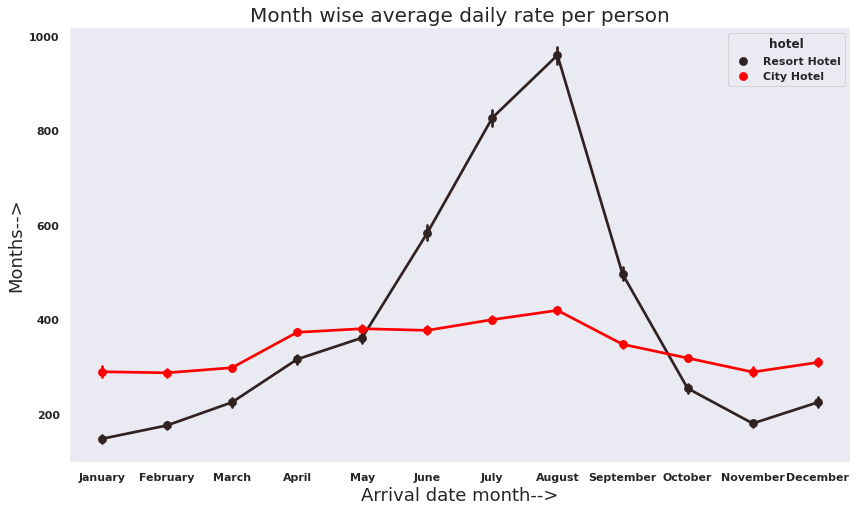

In [151]:
#Calculating Average Daily Rate Per Person 
plt.figure(figsize = (14,8))

df['adr_pp'] = df['adr'] / (df['no_of_adults'] + df['no_of_children']) 
actual_guests = df.loc[df["booking_cancel_status"] != '0']
actual_guests['price'] = actual_guests['adr'] * (actual_guests['stays_in_weekend_nights'] + actual_guests['stays_in_week_nights'])
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
actual_guests['arrival_date_month'] = pd.Categorical(actual_guests['arrival_date_month'], categories = months, ordered=True)
sns.pointplot(data = actual_guests, x = 'arrival_date_month', y = 'price', hue = 'hotel',color='red')
plt.xlabel('Arrival date month-->',fontsize=18)
plt.ylabel('Months-->',fontsize=18)
plt.title('Month wise average daily rate per person',fontsize=20)
plt.show()

Ans6. According to point chart, Minimum adr per person is lowest in **January for Resort Hotel and January, February and November for City hotel**, these months are best deal for hotel booking.

#3. Analysis on the basis of adr(average daily rate).


1.   Relationship between ADR and the total number of stays.
2.   Which hotel generates the highest revenue i.e. Average Daily Rate Per Person?



Q1.Relationship between ADR and the total number of stays.

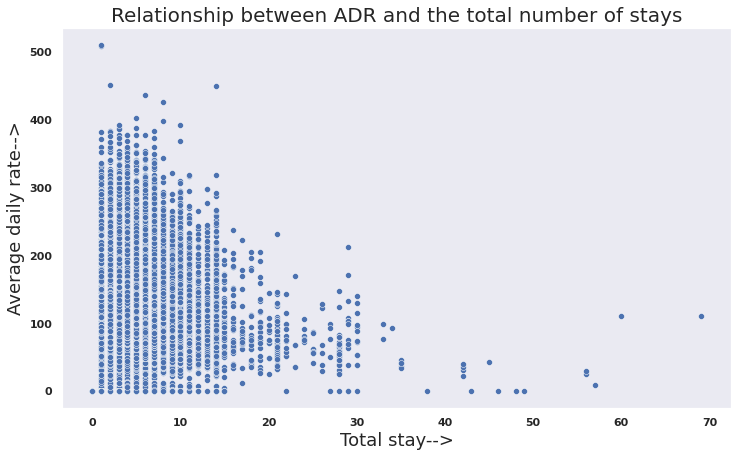

In [152]:
df['total_stay'] = df['stays_in_weekend_nights']+df['stays_in_week_nights']
plt.figure(figsize = (12,7))
sns.scatterplot(y = 'adr', x = 'total_stay', data = df)
plt.xlabel('Total stay-->',fontsize=18)
plt.ylabel('Average daily rate-->',fontsize=18)
plt.title('Relationship between ADR and the total number of stays',fontsize=20)
plt.show()

Ans1. There is a negative correlation between the Total stay and the AdR, which means as the length of total stay increases the adr decreases.

Q2. Which hotel generates the highest revenue i.e. Average Daily Rate Per Person?

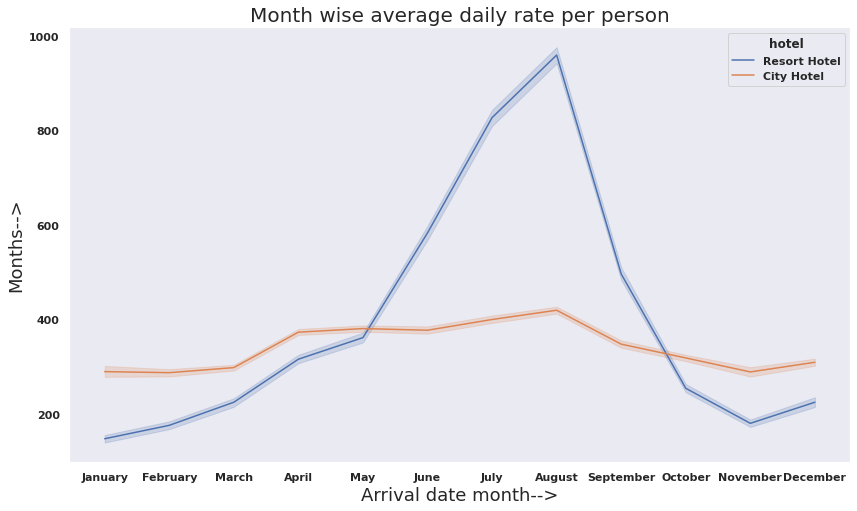

In [153]:
#Calculating Average Daily Rate Per Person 
plt.figure(figsize = (14,8))

df['adr_pp'] = df['adr'] / (df['no_of_adults'] + df['no_of_children']) 
actual_guests = df.loc[df["booking_cancel_status"] != '0']
actual_guests['price'] = actual_guests['adr'] * (actual_guests['stays_in_weekend_nights'] + actual_guests['stays_in_week_nights'])
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
actual_guests['arrival_date_month'] = pd.Categorical(actual_guests['arrival_date_month'], categories = months, ordered=True)
sns.lineplot(data = actual_guests, x = 'arrival_date_month', y = 'price', hue = 'hotel')
plt.xlabel('Arrival date month-->',fontsize=18)
plt.ylabel('Months-->',fontsize=18)
plt.title('Month wise average daily rate per person',fontsize=20)
plt.show()

Ans2. It is clearly seen that Price of Resort hotel are much higher and Prices of city Hotel are less fluctuating . Hence , we can conclude that ***Resort type hotel generates much more revenue*** than city hotel in busiest months i.e. **July and August**




#4. Analysis on the basis of distribution channel


1.   Which distribution channel is mostly used?
2.   Which distribution channel generates the most revenue for hotels?




Q1.   Which distribution channel is mostly used?

In [154]:
df['distribution_channel'].unique()

array(['Direct', 'Corporate', 'TA/TO', 'Undefined', 'GDS'], dtype=object)

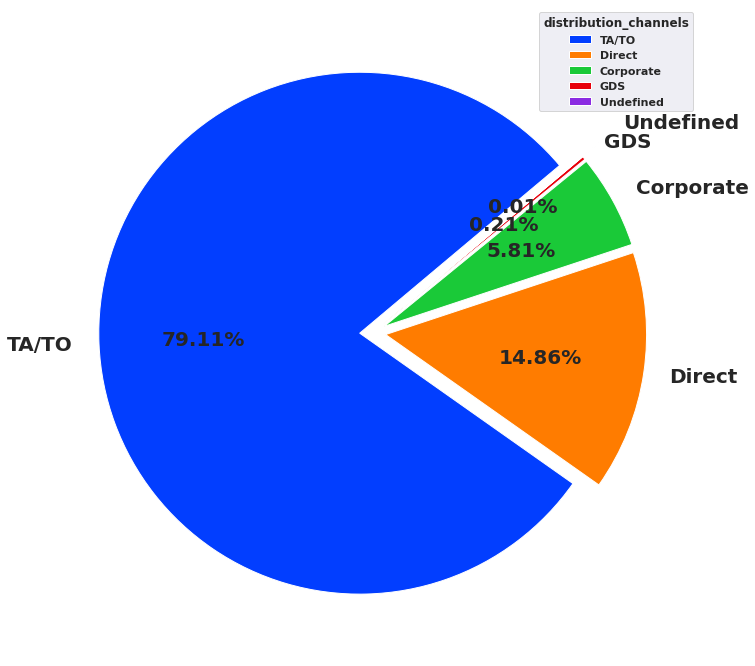

In [155]:
# Pie chart for popular distribution channel percentage wise
dist_vc=pd.DataFrame(df['distribution_channel'].value_counts()).reset_index()
dist_vc['percentage']=(dist_vc['distribution_channel'])*100/dist_vc['distribution_channel'].sum()
dist_vc.columns=['distribution_channel','count','percentage']
plt.figure(figsize= (15,12))
plt.tight_layout()
sort_legend=False
palette_color=sns.color_palette('bright')
plt.pie(dist_vc['percentage'],labels=dist_vc['distribution_channel'],explode=[0.05,0.05,0.05,0.05,0.15],
        startangle=40,colors=palette_color,textprops={'fontsize':20}, autopct='%0.2f%%')
plt.legend(title='distribution_channels')
plt.show()



Ans1. According above pie chart 79.11% bookings are made by TA/TO(Travel agent/Travel operators), so we can say that TA/TO distribution channel is mostly use by groups.

Q2. Which distribution channel generates the most revenue for hotels?

Text(0.5, 1.0, 'Graph between distribution channel and average daily rate(hotel wise)')

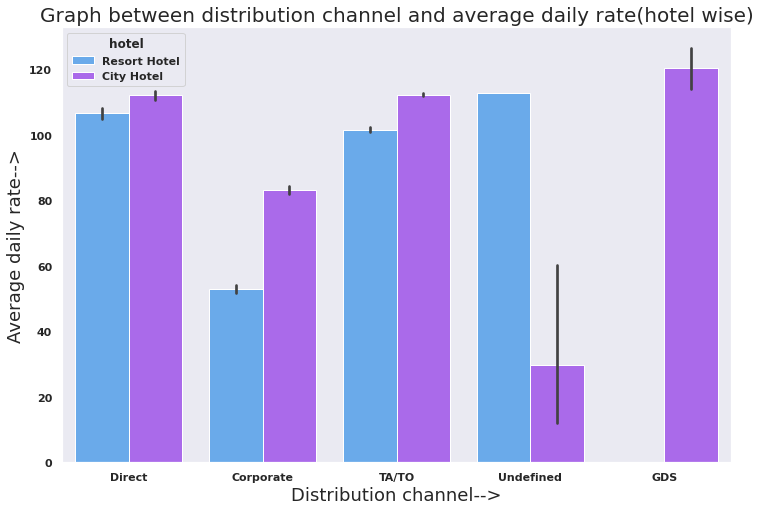

In [156]:
# Graph between distribution channel and average daily rate(hotel wise)
plt.figure(figsize=(12,8))
sns.barplot(x=df['distribution_channel'],y=df['adr'],hue=df['hotel'],palette='cool')
plt.xlabel('Distribution channel-->',fontsize=18)
plt.ylabel('Average daily rate-->',fontsize=18)
plt.title('Graph between distribution channel and average daily rate(hotel wise)',fontsize=20)


Ans2. According to chart, we can say that **GDS(Global Distribution System)** generates more revenue for **City Hotel** and **Undefined** for **Resort Hotel**

#5. Analysis on the basis of deposit type


1.   analyzing which deposit type is preferred most?



Text(0.5, 1.0, 'Graph between deposit type and count')

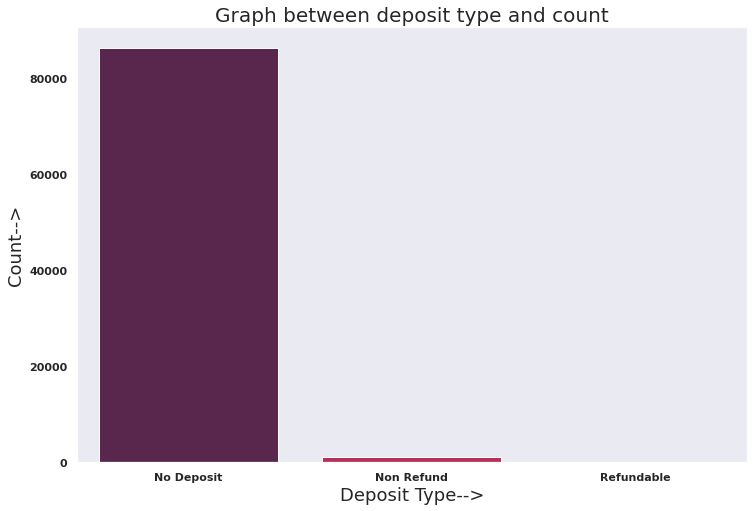

In [157]:
# Graph between deposit type and count
dep_df=pd.DataFrame(df['deposit_type'].value_counts()).reset_index()
dep_df.columns=['deposit_type','count']
plt.figure(figsize=(12,8))
sns.barplot(x=dep_df['deposit_type'],y=dep_df['count'],palette='rocket',units=True)
plt.xlabel('Deposit Type-->',fontsize=18)
plt.ylabel('Count-->',fontsize=18)
plt.title('Graph between deposit type and count',fontsize=20)

Ans1. Most preferred deposit type is **No Deposit** 

#6. Analysis on the basis of meal type


1.   Which type of meal is most and least preferred by the customers?

Text(0.5, 1.0, 'Count of meal type bar graph')

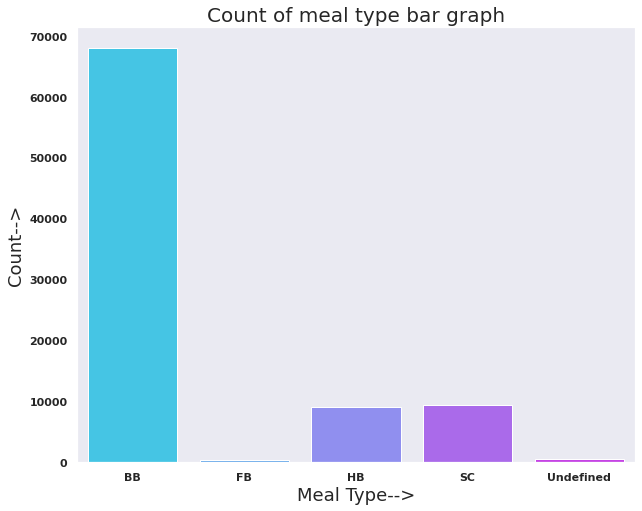

In [158]:
# Count of meal type bar graph
plt.figure(figsize=(10,8))
sns.countplot(df['meal_type'],palette='cool')
plt.xlabel('Meal Type-->',fontsize=18)
plt.ylabel('Count-->',fontsize=18)
plt.title('Count of meal type bar graph',fontsize=20)

Ans1. This bar graph clearly represents that most preferred meal type is 'BB' i.e. Bed and Breakfast and the least preferred one is 'FB' i.e. FB: Full Board(breakfast, lunch and dinner).

#7. Analysis on the basis of customer type

1. Analyzing customer retention on customer type.

In [159]:
only_repeated_cust = df[df['repeated_guest_status']==1]
cust_retention = only_repeated_cust.groupby(['hotel','customer_type'])['repeated_guest_status'].count().unstack()

(array([0, 1]), <a list of 2 Text major ticklabel objects>)

<Figure size 720x360 with 0 Axes>

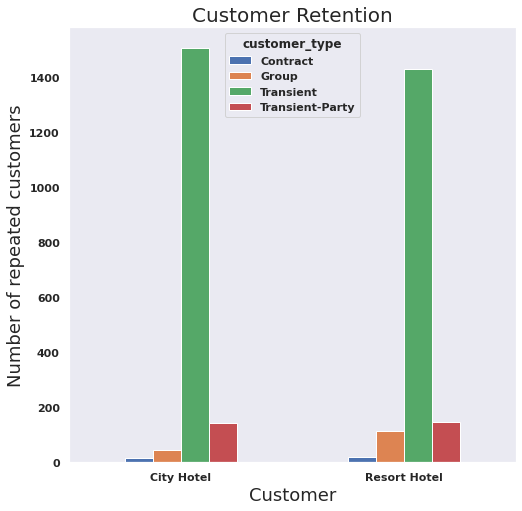

In [160]:
plt.figure(figsize=(10,5))
cust_retention.plot.bar()
plt.title('Customer Retention',fontsize=20)
plt.ylabel('Number of repeated customers',fontsize=18)
plt.xlabel('Customer',fontsize=18)
plt.xticks(rotation = 0)

Ans1. According to Customer Retention Graph, **Transient Customer** is more loyal in both hotels but **City Hotel's Transient Customers are more loyal compared to Resort Hotel's Transient Customers**. 

#8. Analysis on the basis of room type


1.   Which room type is in most demand and which room type generates the highest average daily rate?



In [161]:
df['reserved_room_type'].value_counts()

A    56550
D    17398
E     6049
F     2823
G     2052
B      999
C      915
H      596
L        6
P        6
Name: reserved_room_type, dtype: int64

Text(0.5, 1.0, 'Histogram graph for counts of different assigned room type')

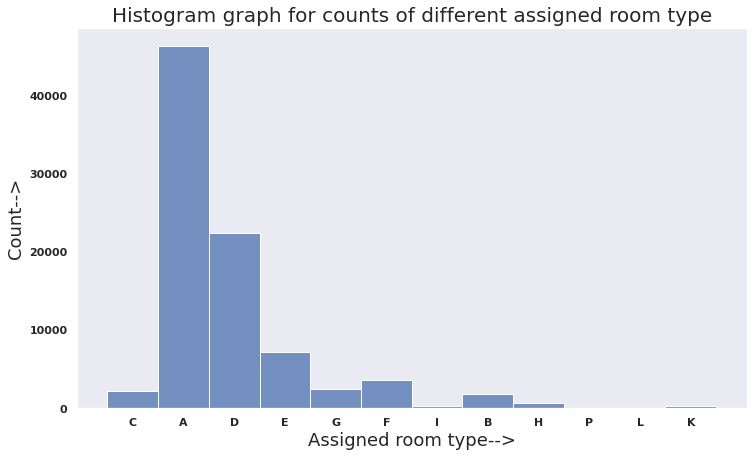

In [162]:
# Histogram graph for counts of different assigned room type
plt.figure(figsize=(12,7))
sns.histplot(df['assigned_room_type'])
plt.xlabel('Assigned room type-->',fontsize=18)
plt.ylabel('Count-->',fontsize=18)
plt.title('Histogram graph for counts of different assigned room type',fontsize=20)

Text(0.5, 1.0, 'Bar graph for Room Type and average adr ')

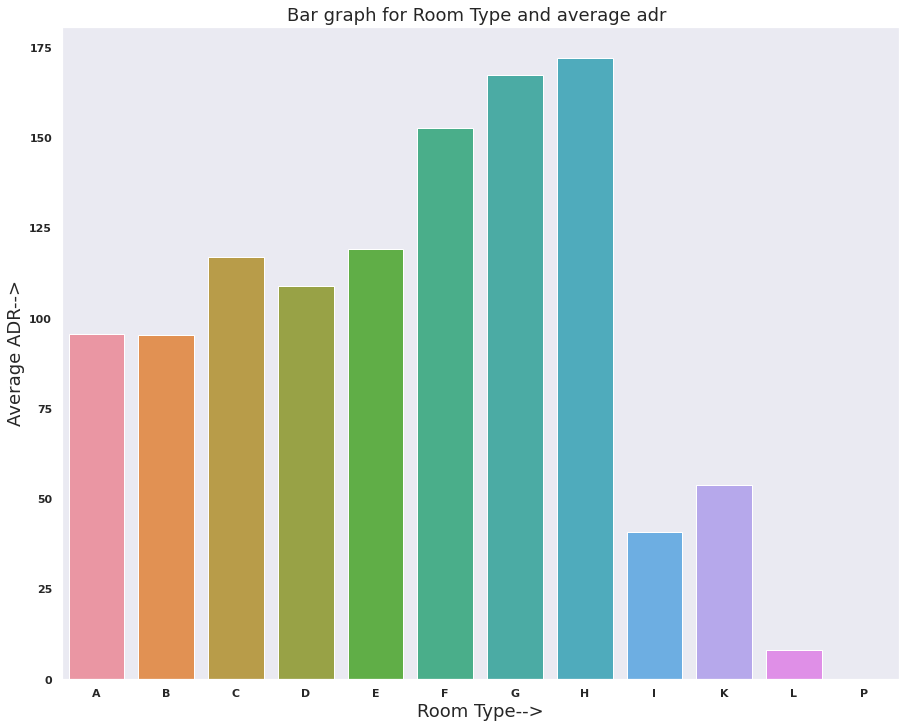

In [163]:
# Bar graph for Room Type and average adr
room_adr=df.groupby('assigned_room_type').agg({'adr':'mean'}).reset_index()
plt.figure(figsize=(15,12))
sns.barplot(x=room_adr['assigned_room_type'].sort_values(ascending=True),y=room_adr['adr'])
plt.xlabel('Room Type-->',fontsize=18)
plt.ylabel('Average ADR-->',fontsize=18)
plt.title('Bar graph for Room Type and average adr ',fontsize=18)

Ans1. According to above histogram chart most demanding room is** A (Room with discount available)** type but according to above bar chart **H (Complimentary use of health facilities)** room type is generates greatest ADR. 

#9. Analysis on the basis of country


1.   Which country has the greatest number of guests?



In [164]:
# group by countries and taking sum of guests
country_guest =df[['country','total_no_in_group']] 
country_guest=country_guest.groupby(by='country').agg({'total_no_in_group':'sum'}).reset_index()

In [165]:
# Visualizing countries on map and no of guests booking hotes in countries. 
basemap = folium.Map()
country_guest_map = px.choropleth(df, locations = country_guest['country'],color = country_guest['total_no_in_group'], hover_name = country_guest['country'],
                                  width=1396,height=800)
country_guest_map.show()

Text(0.5, 1.0, 'Relation between country and Total no of guests')

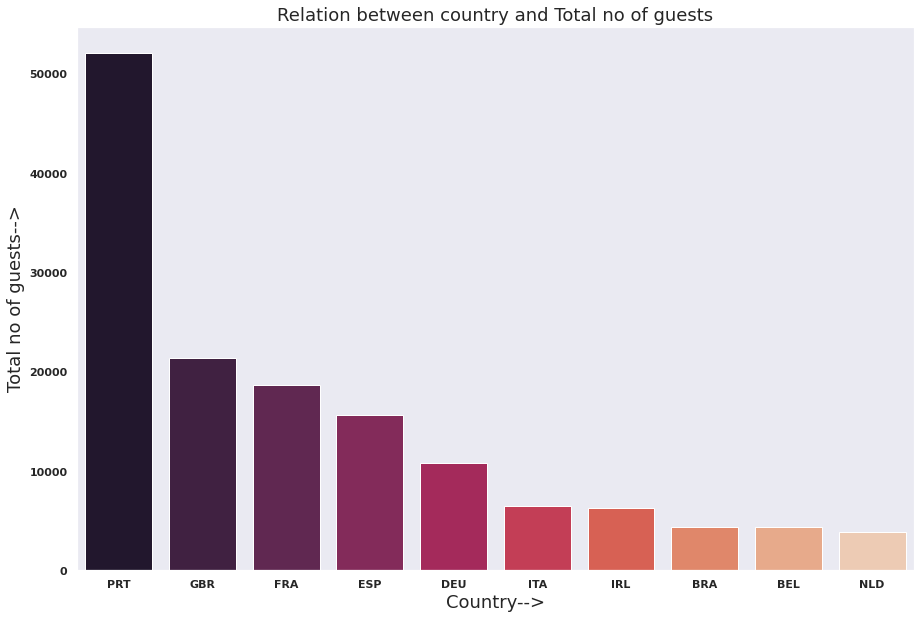

In [166]:
# Number of guests sorted in descending order country wise
country_guest1=country_guest.sort_values(by='total_no_in_group',ascending=False).head(10)
country_guest1
plt.figure(figsize=(15,10))
sns.barplot(x=country_guest1['country'],y=country_guest1['total_no_in_group'],palette='rocket')
plt.xlabel('Country-->',fontsize=18)
plt.ylabel('Total no of guests-->',fontsize=18)
plt.title('Relation between country and Total no of guests',fontsize=18)

Ans1. On the basis on map and chart we can say that most guests come from **Southern Europe** and **Portugal** has the greatest number of guests.